In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
samples = []
std = []
for i in range(10):
  x=df["fare"].dropna().sample(30).values
  std.append(x.std())
  samples.append(x.tolist())

In [5]:
#single sample of 30
df["fare"].dropna().sample(30).values

array([ 52.    ,  47.1   ,   7.0542,  15.2458,  14.4542,  52.    ,
        11.5   ,  90.    ,  24.15  ,   8.05  , 120.    ,  73.5   ,
         9.5   ,  30.5   ,   7.775 ,   6.45  ,  10.5   , 106.425 ,
         7.75  ,  61.3792,  56.9292,  10.4625,  27.    ,  31.3875,
        30.    ,   7.225 ,   8.05  ,  26.    ,   8.6625,   7.25  ])

In [6]:
samples=np.array(samples)

In [7]:
sampling_means=samples.mean(axis=1)

In [8]:
sample_std = np.mean(std)
sample_std

41.36918296847881

95% confidence level in t table

for samples:  df-1=30-1=29

In [9]:
lower_limit = sampling_means.mean()-2.045*(sample_std/np.sqrt(30))

In [10]:
upper_limit = sampling_means.mean()+2.045*(sample_std/np.sqrt(30))

In [11]:
print("the range is",lower_limit,"-",upper_limit)

the range is 12.44768468127617 - 43.33922931872383


we are 95% confident sure that data lies between 18.74 to 48.47

**when population std is given we have to see z-table**

In [12]:
pop_std = df["fare"].std()

In [13]:
smple = []
for i in range(20):
  smple.append(df["fare"].dropna().sample(30).values.tolist())

In [14]:
smple_mean=np.array(smple)

In [15]:
smple_mean.shape

(20, 30)

In [16]:
sample_mean=smple_mean.mean(axis=1)

<Axes: ylabel='Density'>

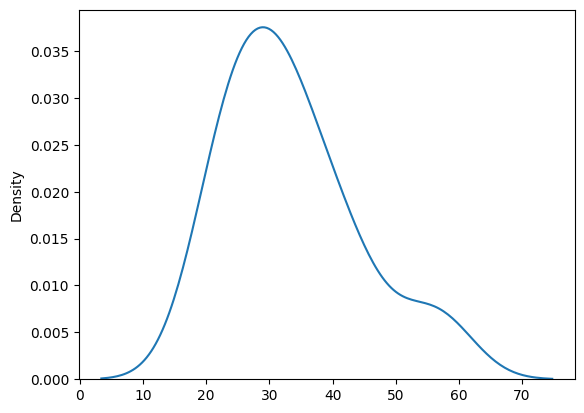

In [17]:
sns.kdeplot(sample_mean)

this follows central limit therom as it says that if you take the sample greater then 30 then inspite of any distribution it will make the normal distribution

In [18]:
lower_limit = sample_mean.mean() - 2 * pop_std / np.sqrt(30)
upper_limit = sample_mean.mean() + 2* pop_std / np.sqrt(30)

In [19]:
print("the range is :",lower_limit,"-",upper_limit)

the range is : 15.339870965034482 - 51.630820034965524


we are 95% confident sure that value lies between 15 to 51

In [20]:
df["fare"].mean()

32.204207968574636

**hypothesis testing single-sample-t-Test**

In [21]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
age=df["age"].dropna()

In [23]:
sample_age=age.sample(25).values

In [24]:
sample_age

array([27., 19., 26., 19., 48., 25., 39., 58., 30., 54., 42., 35., 61.,
       24., 17., 50., 20.,  6., 35., 21., 31., 24., 55., 29., 31.])

#h0-->the mean age is 35
#h1-->the mean is less than 35

In [25]:
#check for normality using Shapiro wilk test
from scipy.stats import shapiro

shapiro_age = shapiro(sample_age)
print(shapiro_age)

ShapiroResult(statistic=0.9463051557540894, pvalue=0.20669308304786682)


if this p_value < 0.05 then it is not normal else
normal

In [26]:
pop_mean = 35

In [27]:
import scipy.stats as stats
t_statistic,p_value = stats.ttest_1samp(sample_age,pop_mean)
print("t_statistic:",t_statistic)
print("p_value",p_value/2)

t_statistic: -0.6784918504609548
p_value 0.25197510309878113


since it is one tailed test so we have to divide by 2

In [28]:
alpha = 0.05
if p_value<alpha:
  print("reject the null hypothesis")
else:
  print("fail to reject the null hypothesis")

fail to reject the null hypothesis


In [29]:
df["age"].mean()

29.69911764705882

we proved that age is less than 35

**Independent 2 sample t-test**

you may say we can see the avg using graphs but we are talking about population using sample data

In [30]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
pop_male=df[df["sex"]=="male"]["age"].dropna()
pop_female=df[df["sex"]=="female"]["age"].dropna()

In [32]:
pop_female

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
879    56.0
880    25.0
882    22.0
885    39.0
887    19.0
Name: age, Length: 261, dtype: float64

In [33]:
sample_male=pop_male.sample(25)
sample_female=pop_female.sample(25)

#h0:avg age of male and female are equal

#h1: avg age of male is greater than avg age of female

In [34]:
from scipy.stats import shapiro

shapiro_male=shapiro(sample_male)
shapiro_female=shapiro(sample_female)

print("shapiro wilk test for male:",shapiro_male)
print("shapiro wilk test for female:",shapiro_female)

shapiro wilk test for male: ShapiroResult(statistic=0.9629818201065063, pvalue=0.4770013391971588)
shapiro wilk test for female: ShapiroResult(statistic=0.9677551984786987, pvalue=0.5888277888298035)


if pvalue>0.05 then it is normal distribution

**check the variance of male and female**

In [35]:
from scipy.stats import levene
levene_test = levene(sample_female,sample_male)

print(levene_test)

LeveneResult(statistic=0.0884991226974916, pvalue=0.7673776991803842)


if pvalue< 0.05 then they are not equal but lets assume they are equal

In [36]:
t_statistic,p_value =stats.ttest_ind(sample_male,sample_female)
print("t-statistic:",t_statistic)
print("p_value",p_value/2)

t-statistic: 2.8573655858969538
p_value 0.0031490732517298575


In [37]:
if p_value< 0.05:  # Assuming a significance level of 0.05
    print("Reject the null hypothesis.There is evidence that the average age of males is greater than the average age of females.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that the average age of males is greater than the average age of females.")

Reject the null hypothesis.There is evidence that the average age of males is greater than the average age of females.


In [38]:
pop_male.mean()

30.72664459161148

In [39]:
pop_female.mean()

27.915708812260537

**Paired 2 sample t-test**

In [40]:
before = np.array([80, 92, 75, 68, 85, 78, 73, 90, 70, 88, 76, 84, 82, 77, 91])
after = np.array([78, 80, 81, 67, 88, 76, 74, 91, 69, 88, 77, 81, 80, 79, 88])

In [41]:
differences = after - before

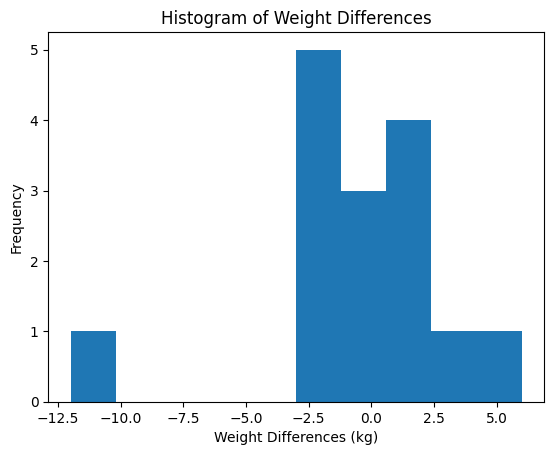

Shapiro-Wilk test: ShapiroResult(statistic=0.8691772222518921, pvalue=0.03281594440340996)


In [42]:
plt.hist(differences)
plt.title("Histogram of Weight Differences")
plt.xlabel("Weight Differences (kg)")
plt.ylabel("Frequency")
plt.show()

shapiro_test = stats.shapiro(differences)
print("Shapiro-Wilk test:", shapiro_test)

In [43]:
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)

In [44]:
n = len(differences)
t_statistic = mean_diff / (std_diff / np.sqrt(n))
df = n - 1

In [45]:
t_statistic

-0.7844645405527363

In [46]:
alpha = 0.05
p_value = stats.t.cdf(t_statistic, df)

In [47]:
p_value

0.22291946969250365

**Chi square test**

In [50]:
from scipy.stats import chisquare

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
# Count passengers in each class
class_counts = data['Pclass'].value_counts().sort_index()
class_counts

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [53]:
# Calculate the expected counts assuming a uniform distribution
total_passengers = len(data)
expected_counts = total_passengers / 3
expected = [expected_counts] * 3
print("Expected Passenger Counts (assuming uniform distribution):\n", expected)


Expected Passenger Counts (assuming uniform distribution):
 [297.0, 297.0, 297.0]


In [55]:
# Perform the Chi-Square Goodness of Fit test
chi2, p_value = chisquare(class_counts, expected)

# Print the results
print("\nChi-Square Statistic: {:.2f}".format(chi2))
print("P-value: {:.4f}".format(p_value))


Chi-Square Statistic: 191.80
P-value: 0.0000


In [56]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. The distribution of passengers among the classes is not uniform.")
else:
    print("\nWe fail to reject the null hypothesis. The distribution of passengers among the classes is uniform.")



We reject the null hypothesis. The distribution of passengers among the classes is not uniform.


In [57]:
# We will use the Chi-Square test for independence to see if the survival rate of passengers is independent of the passenger class.
from scipy.stats import chi2_contingency

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
contingency_table = pd.crosstab(data['Survived'], data['Pclass'])
contingency_table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [60]:
# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("\nChi-Square Statistic: {:.2f}".format(chi2))
print("P-value: {:.4f}".format(p_value))
print("Degrees of Freedom: {}".format(dof))
print("Expected Frequencies: \n{}".format(expected))



Chi-Square Statistic: 102.89
P-value: 0.0000
Degrees of Freedom: 2
Expected Frequencies: 
[[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


In [61]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. There is a significant association between passenger class and survival rate.")
else:
    print("\nWe fail to reject the null hypothesis. There is no significant association between passenger class and survival rate.")


We reject the null hypothesis. There is a significant association between passenger class and survival rate.


**Anova Test**

In [62]:
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url).dropna(subset=['Age'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df[df['Pclass'] == 3]['Age'].mean()

25.14061971830986

In [64]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Age ~ Pclass', data = df).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                 sum_sq     df           F        PR(>F)
Pclass     20511.429755    1.0  112.386893  1.756699e-24
Residual  129945.206190  712.0         NaN           NaN


In [65]:
import scipy.stats as stats

for class1,class2 in [(1,2),(2,3),(3,1)]:
  print(class1,class2)
  print(stats.ttest_ind(df[df['Pclass'] == class1]['Age'], df[df['Pclass'] == class2]['Age']))

1 2
Ttest_indResult(statistic=5.485187676773201, pvalue=7.835568991415144e-08)
2 3
Ttest_indResult(statistic=3.927800191020872, pvalue=9.715078600777852e-05)
3 1
Ttest_indResult(statistic=-10.849122601201033, pvalue=6.134470007830625e-25)


,0,1,2,3,4,5,6
0,group1,group2,meandiff,p-adj,lower,upper,reject
1,1,2,-8.3558,0.0,-11.7041,-5.0075,True
2,1,3,-13.0928,0.0,-15.9622,-10.2234,True
3,2,3,-4.737,0.0005,-7.6763,-1.7977,True


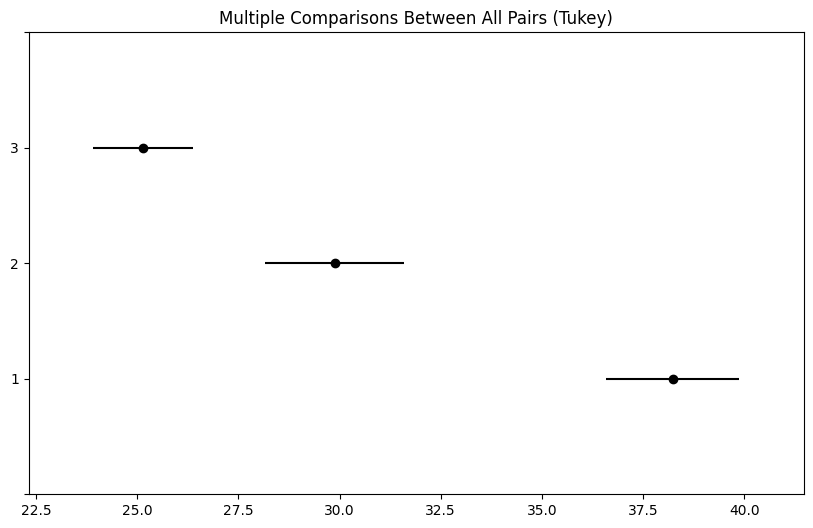

In [66]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

tukey = pairwise_tukeyhsd(endog=df['Age'], groups=df['Pclass'], alpha=0.05)

tukey.plot_simultaneous()

plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

pd.DataFrame(tukey.summary())